In [152]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..\project1')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Import self-made modules
from linear_model import LinearModel
from make_and_prepare_data import FrankeFunction, create_design_matrix
from model_selection import R2, MSE

# Import plotting functions
from plotting import plot_mse_per_poldegree, plot_R2_per_poldegree

In [390]:
# Choose parameters for model
pol_degree = 10
data_size = 600
test_size = 0.2
error_std = 0.1
save_fig = True

In [391]:
# Make data
np.random.seed(5)

x = np.random.uniform(0, 1, data_size)
y = np.random.uniform(0, 1, data_size)

z = FrankeFunction(x, y) + np.random.normal(scale = error_std, size = data_size)

In [392]:
# Define empty list in which to store the MSE and R2 errors
mses = []
mses_train = []
r2s = []
r2s_train = []


# Train and test model for different polynomial derees
for i in range(1, pol_degree+1):
    X = create_design_matrix(x, y, i)
    
    # Split data in train and test
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = test_size)
    
    # Train model
    lr = LinearModel()
    lr.fit(X_train, z_train)
    
    # Made predictions on train and test set
    z_pred_test = lr.predict(X_test)
    z_pred_train = lr.predict(X_train)
    
    # Calculate errors for test set
    mses.append(MSE(z_test, z_pred_test))
    r2s.append(R2(z_test, z_pred_test))
    
    # Calculate errors for train set
    mses_train.append(MSE(z_train, z_pred_train))
    r2s_train.append(R2(z_train, z_pred_train)) 

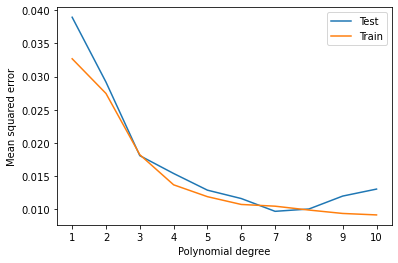

In [393]:
# Plot MSE
plot_mse_per_poldegree(mses_train, mses, pol_degree=pol_degree, save_plot = save_fig, save_title = 'OLS_MSE_n=' + str(data_size) + ', sigma=' + str(error_std))

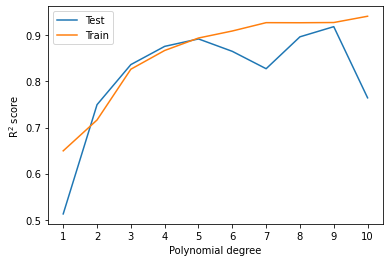

In [353]:
# Plot R2
plot_R2_per_poldegree(r2s_train, r2s, pol_degree=pol_degree, save_plot = save_fig, save_title = 'OLS_R2_n=' + str(data_size) + ', sigma= ' + str(error_std))